In [ ]:
import sys
sys.path.insert(0, "/home/jovyan/work/src")

# Preprocessing


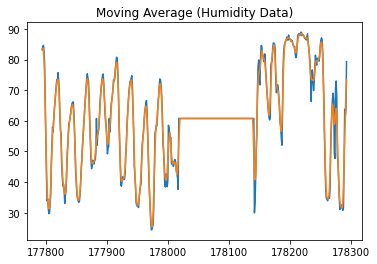

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

from preprocessing.imputing import impute_simple_imputer
from preprocessing.moving_average import moving_average
from utils.sqlite_utils import get_engine, get_time_series


def graph_moving_average():
	"""
		Graphs some part of out dataset once without moving average, once with moving average
	"""
	timeseries: pd.DataFrame = get_time_series(get_engine(), "zurich", "Zch_Stampfenbachstrasse")
	data = impute_simple_imputer(timeseries[["Zch_Stampfenbachstrasse.Humidity"]][-750:-250], False)
	data_smooth = moving_average(data, False)
	fig, ax = plt.subplots(1)
	ax.set_title("Moving Average (Humidity Data)")
	ax.plot(data)
	ax.plot(data_smooth)
	fig.show()

graph_moving_average()

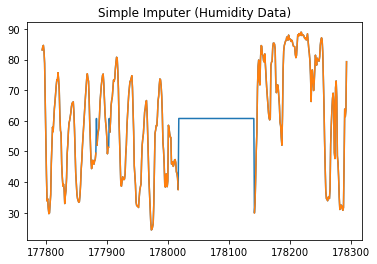

In [8]:
def graph_simple_imputer():
	"""
		Graph the results of the simple imputer
	"""
	timeseries: pd.DataFrame = get_time_series(get_engine(), "zurich", "Zch_Stampfenbachstrasse")
	data = timeseries[["Zch_Stampfenbachstrasse.Humidity"]][-750:-250]
	data_imputed = impute_simple_imputer(data, False)
	fig, ax = plt.subplots(1)
	ax.set_title("Simple Imputer (Humidity Data)")
	ax.plot(data_imputed)
	ax.plot(data)
	fig.savefig("simple_imputer.png")

graph_simple_imputer()